In [5]:
#Importing Necesssary Libraries
import os
import pickle
import csv
from PIL import Image
import math
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from sklearn.utils import shuffle

print('All modules imported.')

All modules imported.


In [6]:
#Class Labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

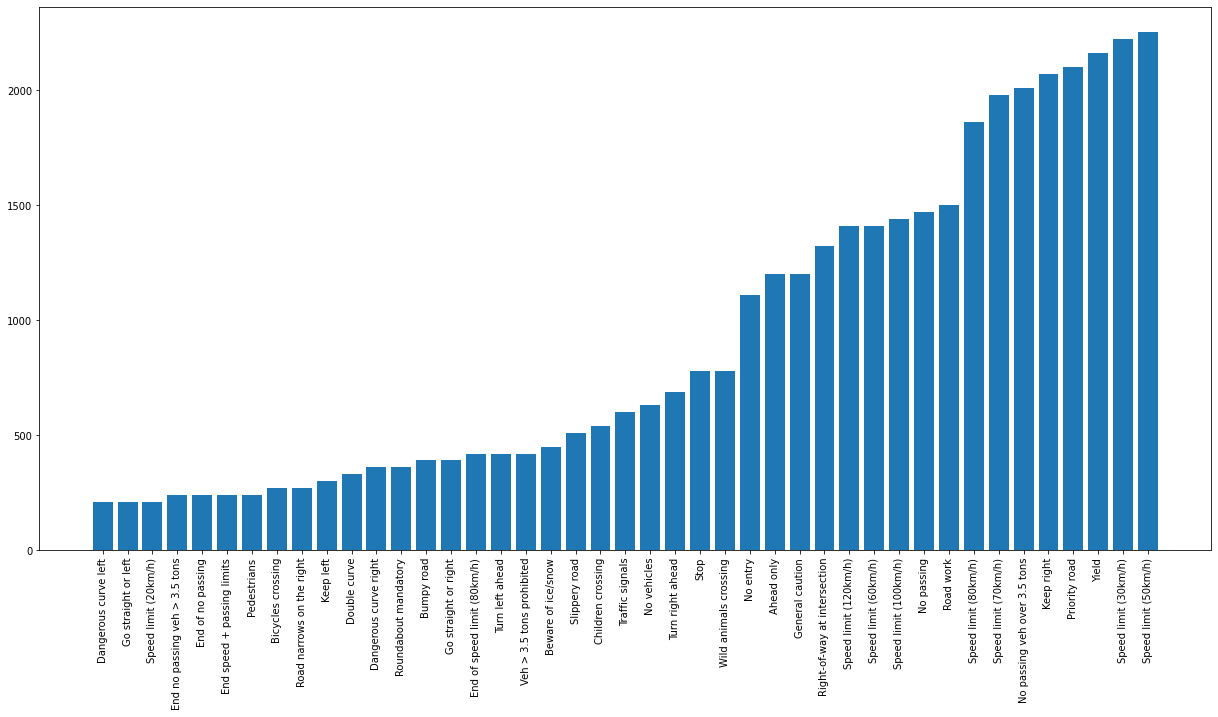

In [7]:
#Histogram of the classses

train_path = "Train"

folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
# 1,2,8,9,10,12,13,14,17,33,34,36,37

In [12]:
import pandas as pd

df = pd.read_csv('Test.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [15]:
newdf = df[df.ClassId.isin([1,2,8,9,10,12,13,14,17,33,34,36,37])]
newdf

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
1,42,45,5,5,36,40,1,Test/00001.png
3,27,29,5,5,22,24,33,Test/00003.png
7,32,33,5,5,26,28,12,Test/00007.png
10,38,37,6,5,33,32,12,Test/00010.png
15,27,27,6,6,22,22,9,Test/00015.png
...,...,...,...,...,...,...,...,...
12620,63,57,6,5,58,52,13,Test/12620.png
12622,35,35,6,5,29,30,12,Test/12622.png
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png


In [21]:
newdf.Path
newdf.to_csv("Test_reduced.csv")

In [20]:
import shutil

for i in newdf.Path:
    shutil.copy2(i,"Test_reduced/")

In [ ]:
# Speed Limits : 30,50,120
# 


# YOUR CODE HERE for plotting the images
# pltsize=1
# plt.figure(figsize=(15*pltsize, pltsize))

# for i in range(15):
#     plt.subplot(1,15,i+1)
#     plt.axis('off')
#     plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
#     plt.title('Class:'+str(y_train[i].numpy()))